# Export data from SQL to CSV

First we export the data we are interested from SQL into CSV files. Each CSV file will have data from a single table.

The SQL code for doing this is available in example-patient-data-export.sql

Assuming the files are in the search path for MATLAB (usually the current directory works best), we can now load the data into MATLAB.

In [1]:
% load the various files
fp = fopen('example-patient-chartevents.csv');
header_ce = fgetl(fp);

% convert header from a string to a cell array of strings
header_ce = regexp(header_ce,',','split');

frmt = '%f%f%f%s%f%q%q';
data_ce = textscan(fp,frmt,'delimiter',',');
fclose(fp);

% Let's extract the numeric data only into data_ce - and put string data into data_ce_str
idxNumeric = cellfun(@isnumeric, data_ce);
data_ce_str = [data_ce{~idxNumeric}];
header_ce_str = header_ce(~idxNumeric);
data_ce = [data_ce{idxNumeric}];
header_ce = header_ce(idxNumeric);

% here's a preview of the string data
header_ce_str
data_ce_str(1:5,:)

header_ce_str = 

    'value'    'valueuom'    'label'


ans = 

    '138'    'bpm'         'Heart Rate'          
    '72'     '%'           'O2 saturation pul...'
    '24'     'insp/min'    'Respiratory Rate'    
    '98'     'mmHg'        'Arterial Blood Pr...'
    '77'     'mmHg'        'Arterial Blood Pr...'

In [2]:
% here's a nicer preview of the numeric data ('\t' is a tab)

fprintf('%8s\t',header_ce{:});
fprintf('\n')

frmt = '%8g\t%8.2f\t%8g\t%8.2f';
for n=1:5
    fprintf(frmt,data_ce(n,:));
    fprintf('\n');
end

icustay_id	   hours	  itemid	valuenum	
  236942	    3.35	  220045	  138.00
  236942	    3.52	  220277	   72.00
  236942	    3.52	  220210	   24.00
  236942	    3.69	  220052	   98.00
  236942	    3.69	  220051	   77.00

In [3]:
% Time to load in the rest of the data!

% LAB DATA
frmt = '%f%f%f%s%f%q%q';

fp = fopen('example-patient-labevents.csv');
header_le = fgetl(fp);
header_le = regexp(header_le,',','split');
data_le = textscan(fp,frmt,'delimiter',',');
fclose(fp);
idxNumeric = cellfun(@isnumeric, data_le);
data_le_str = [data_le{~idxNumeric}];
header_le_str = header_le(~idxNumeric);
data_le = [data_le{idxNumeric}];
header_le = header_le(idxNumeric);

% INPUT DATA
frmt = '%f%f%f%f%f%q%f%q%f%q';

fp = fopen('example-patient-inputevents.csv');
header_ie = fgetl(fp);
header_ie = regexp(header_ie,',','split');
data_ie = textscan(fp,frmt,'delimiter',',');
fclose(fp);
idxNumeric = cellfun(@isnumeric, data_ie);
data_ie_str = [data_ie{~idxNumeric}];
header_ie_str = header_ie(~idxNumeric);
data_ie = [data_ie{idxNumeric}];
header_ie = header_ie(idxNumeric);


% OUTPUT DATA
frmt = '%f%f%f%f%q%q';

fp = fopen('example-patient-outputevents.csv');
header_oe = fgetl(fp);
header_oe = regexp(header_oe,',','split');
data_oe = textscan(fp,frmt,'delimiter',',');
fclose(fp);
idxNumeric = cellfun(@isnumeric, data_oe);
data_oe_str = [data_oe{~idxNumeric}];
header_oe_str = header_oe(~idxNumeric);
data_oe = [data_oe{idxNumeric}];
header_oe = header_oe(idxNumeric);

% PROCEDURE DATA
frmt = '%f%f%f%f%f%q%f%q';

fp = fopen('example-patient-procedureevents.csv');
header_pe = fgetl(fp);
header_pe = regexp(header_pe,',','split');
data_pe = textscan(fp,frmt,'delimiter',',');
fclose(fp);
idxNumeric = cellfun(@isnumeric, data_pe);
data_pe_str = [data_pe{~idxNumeric}];
header_pe_str = header_pe(~idxNumeric);
data_pe = [data_pe{idxNumeric}];
header_pe = header_pe(idxNumeric);

In [4]:
% Some variables used to make pretty plots
col = [0.9047    0.1918    0.1988
    0.2941    0.5447    0.7494
    0.3718    0.7176    0.3612
    1.0000    0.5482    0.1000
    0.4550    0.4946    0.4722
    0.6859    0.4035    0.2412
    0.9718    0.5553    0.7741];
marker = {'d','+','o','x','s','^','>','<'};
ms = repmat(8,1,numel(marker));

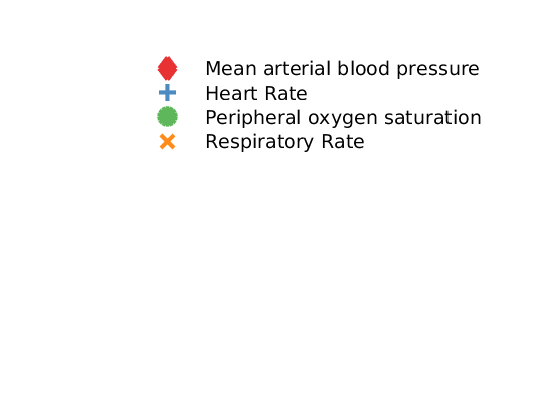

In [5]:
lbl_plot = {'Arterial Blood Pressure mean','Heart Rate','O2 saturation pulseoxymetry','Respiratory Rate'};

% create a neater version of this to populate the legend
legend_str = {'Mean arterial blood pressure','Heart Rate','Peripheral oxygen saturation','Respiratory Rate'};

% dummy figure to provide the legend
figure(1); clf; hold all;
% plot the values
for k=1:numel(lbl_plot)
    plot(-1, -1, marker{k},...
        'Color',col(k,:), 'MarkerFaceColor',col(k,:), 'markersize',ms(k), 'linewidth',2);
end
set(gca,'XLim',[0,48],'YLim',[0,150]);
set(gca,'Visible','off')

hleg=legend(legend_str,'Location','NorthEast');
set(hleg,'Box','off');

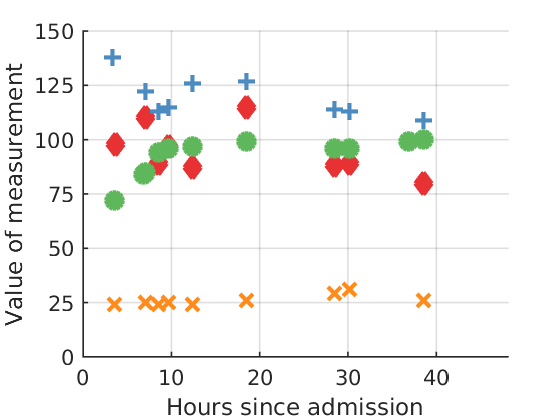

In [6]:
figure(1); clf; hold all;
% plot the values
for k=1:numel(lbl_plot)
    idxPlot = ismember(data_ce_str(:,3), lbl_plot{k});
    plot(data_ce(idxPlot,2), data_ce(idxPlot,4),marker{k},...
        'Color',col(k,:), 'MarkerFaceColor',col(k,:), 'markersize',ms(k), 'linewidth',2);
end


set(gca,'XLim',[0,48],'YLim',[0,150]);
set(gca,'YTick',0:25:150);

xlabel('Hours since admission');
ylabel('Value of measurement');
grid on;

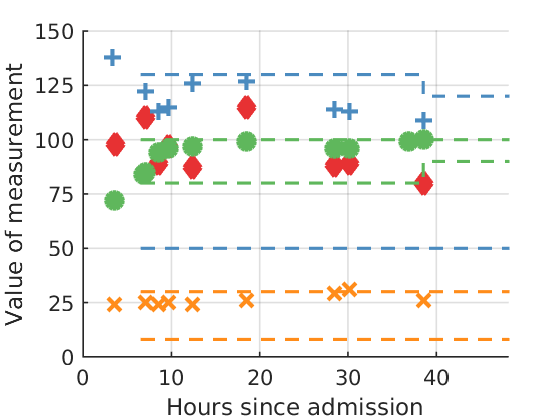

In [7]:
% Plot the same with alarm thresholds

figure(1); clf; hold all;
% plot the values
for k=1:numel(lbl_plot)
    idxPlot = ismember(data_ce_str(:,3), lbl_plot{k});
    plot(data_ce(idxPlot,2), data_ce(idxPlot,4),marker{k},...
        'Color',col(k,:), 'MarkerFaceColor',col(k,:), 'markersize',ms(k), 'linewidth',2);
end


set(gca,'XLim',[0,48],'YLim',[0,150]);
set(gca,'YTick',0:25:150);

xlabel('Hours since admission');
ylabel('Value of measurement');
grid on;

lbl_alarm = {...
    'Arterial Blood Pressure Alarm - Low','Arterial Blood Pressure Alarm - High',...
    'Heart Rate Alarm - Low','Heart rate Alarm - High',...
    'O2 Saturation Pulseoxymetry Alarm - High','O2 Saturation Pulseoxymetry Alarm - Low',...
    'Resp Alarm - High','Resp Alarm - Low'};
    
for k=1:2:numel(lbl_alarm)
    %=== alarm 1 - low alarm
    idxPlot = ismember(data_ce_str(:,3), lbl_alarm{k});

    data_plot = repmat(data_ce(idxPlot,4),1,2);
    data_plot = data_plot';
    data_plot = data_plot(:);
    data_plot = data_plot(1:end-1);

    time_plot = repmat(data_ce(idxPlot,2),1,2);
    time_plot = time_plot';
    time_plot = time_plot(:);
    time_plot = time_plot(2:end);
    plot(time_plot, data_plot , '--',...
        'Color',col(floor((k+1)/2),:), 'linewidth',1.5,...
        'HandleVisibility','off');


    %=== alarm 2 - high alarm
    idxPlot = ismember(data_ce_str(:,3), lbl_alarm{k+1});

    data_plot = repmat(data_ce(idxPlot,4),1,2);
    data_plot = data_plot';
    data_plot = data_plot(:);
    data_plot = data_plot(1:end-1);

    time_plot = repmat(data_ce(idxPlot,2),1,2);
    time_plot = time_plot';
    time_plot = time_plot(:);
    time_plot = time_plot(2:end);

    plot(time_plot, data_plot , '--',...
        'Color',col(floor((k+1)/2),:), 'linewidth',1.5,...
        'HandleVisibility','off');
end